In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from scipy import stats
import numpy as np

In [211]:
# Cargar el csv
file_path = 'cars.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


# Limpieza

In [212]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
missing_values

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

In [213]:
# Porcentaje de valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage

CODE                0.000000
PRODUCTO            0.000000
TIPO_CARROCERIA     0.000000
COMBUSTIBLE         0.000000
Potencia_           0.000000
TRANS               0.000000
FORMA_PAGO          0.000000
ESTADO_CIVIL        1.533187
GENERO              1.481507
OcupaciOn           0.000000
PROVINCIA           0.000000
Campanna1           0.000000
Campanna2           0.000000
Campanna3           0.000000
Zona _Renta        22.701511
REV_Garantia        0.000000
Averia_grave        0.001723
QUEJA_CAC           0.000000
EDAD_COCHE          0.000000
COSTE_VENTA         0.000000
km_anno             0.000000
Mas_1_coche         0.000000
Revisiones          0.000000
Edad Cliente        0.000000
Tiempo              0.000000
dtype: float64

In [214]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

In [215]:
# Identificar valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage


CODE               0.0
PRODUCTO           0.0
TIPO_CARROCERIA    0.0
COMBUSTIBLE        0.0
Potencia_          0.0
TRANS              0.0
FORMA_PAGO         0.0
ESTADO_CIVIL       0.0
GENERO             0.0
OcupaciOn          0.0
PROVINCIA          0.0
Campanna1          0.0
Campanna2          0.0
Campanna3          0.0
Zona _Renta        0.0
REV_Garantia       0.0
Averia_grave       0.0
QUEJA_CAC          0.0
EDAD_COCHE         0.0
COSTE_VENTA        0.0
km_anno            0.0
Mas_1_coche        0.0
Revisiones         0.0
Edad Cliente       0.0
Tiempo             0.0
dtype: float64

In [216]:
df['COSTE_VENTA'].min() , df['COSTE_VENTA'].max()

(0, 18455)

In [217]:
df['Zona _Renta'].unique()

array(['Medio-Bajo', 'Medio', 'Alto', 'Otros'], dtype=object)

In [218]:
# Definir la función para mapear los valores
def map_values(value):
    if value == 'Medio-Bajo':
        return 0.5
    elif value == 'Medio':
        return 1
    elif value == 'Alto':
        return 2
    else:
        return 1

In [219]:
# Aplicar la función a la COMBO_ZONA_TIEMPO 'COMBO_ZONA_TIEMPO_objeto' y crear una nueva columna
df['Zona _Renta'] = df['Zona _Renta'].apply(map_values)

In [220]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

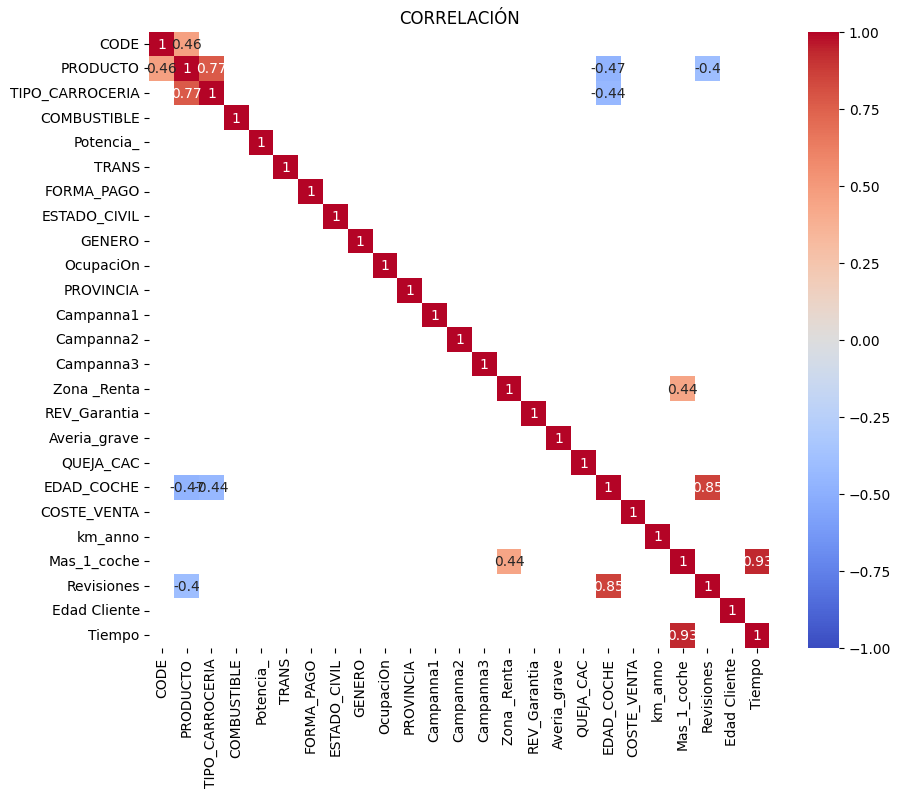

In [221]:
# Calcular la matriz de correlación
corr = df.corr()

# Aplicar un filtro para mostrar solo las correlaciones superiores a 0.6 o inferiores a -0.6
filtered_corr = corr[(corr > 0.4) | (corr < -0.4)]

# Crear el heatmap solo con las correlaciones filtradas
plt.figure(figsize=(10, 8))
plt.title('CORRELACIÓN')
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [222]:
df['Zona _Renta'].unique()

array([0.5, 1. , 2. ])

- Medio-Bajo = 0.5
- Medio = 1
- Alto = 2
- Otros = 1

In [223]:
# Normalizar una columna con Min-Max
df['COSTE_VENTA'] = (df['COSTE_VENTA'] - df['COSTE_VENTA'].min()) / (df['COSTE_VENTA'].max() - df['COSTE_VENTA'].min())

In [224]:
df['COMBO_COSTEVENTA_ZONA'] = (0.4) * df['Zona _Renta'] + (0.35) * df['COSTE_VENTA']
df['COMBO_COSTEVENTA_ZONA'].min(), df['COMBO_COSTEVENTA_ZONA'].max()

(0.2, 1.0551178542400435)

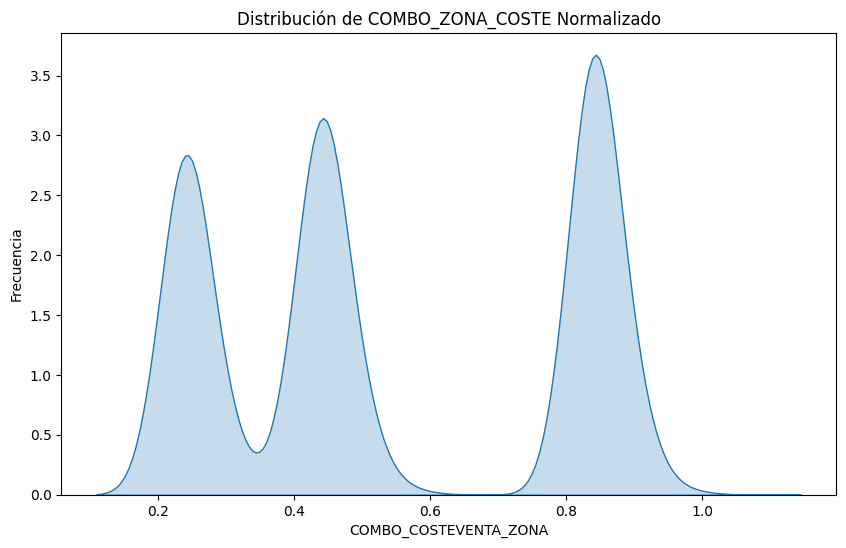

In [225]:
# Graficar la distribución con histograma y densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['COMBO_COSTEVENTA_ZONA'], fill=True)  # kde=True agrega la curva gaussiana de densidad
plt.title(f'Distribución de COMBO_ZONA_COSTE Normalizado')
plt.xlabel('COMBO_COSTEVENTA_ZONA')
plt.ylabel('Frecuencia')
plt.show()

## Normalizamos los datos de esta columna

In [226]:
# Normalizar una columna con Min-Max
df['COMBO_COSTEVENTA_ZONA'] = (df['COMBO_COSTEVENTA_ZONA'] - df['COMBO_COSTEVENTA_ZONA'].min()) / (df['COMBO_COSTEVENTA_ZONA'].max() - df['COMBO_COSTEVENTA_ZONA'].min())

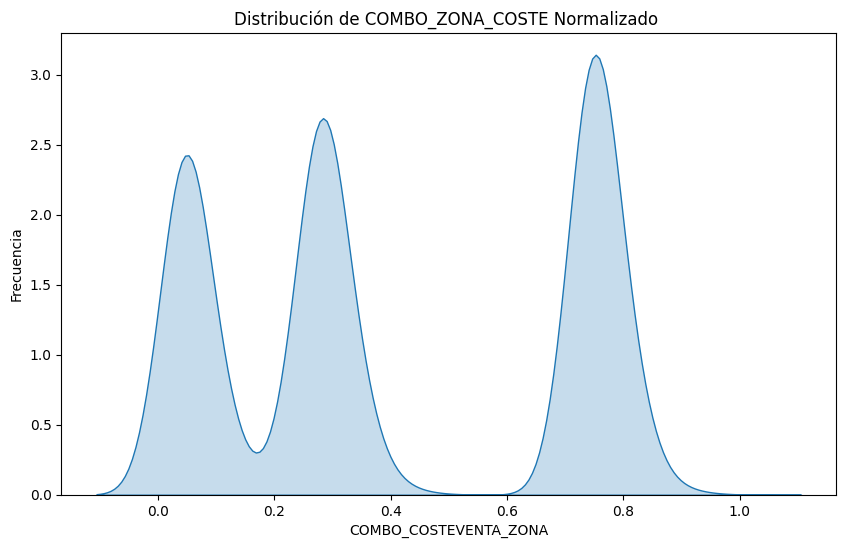

In [227]:
# Graficar la distribución con histograma y densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df['COMBO_COSTEVENTA_ZONA'], fill=True)  # kde=True agrega la curva gaussiana de densidad
plt.title(f'Distribución de COMBO_ZONA_COSTE Normalizado ')
plt.xlabel('COMBO_COSTEVENTA_ZONA')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\mglez\AppData\Local\Temp\ipykernel_12056\1216444203.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[numeric_columns].values, labels=numeric_columns)


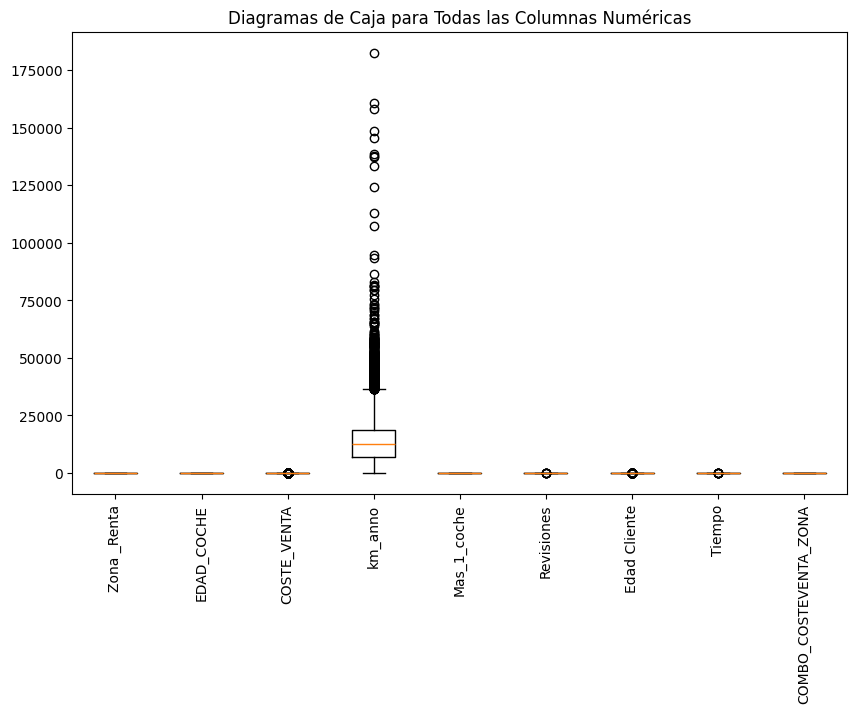

In [228]:
# Seleccionar solo las columnas numéricas
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Crear el boxplot con todas las columnas numéricas
plt.figure(figsize=(10, 6))
plt.boxplot(df[numeric_columns].values, labels=numeric_columns)
plt.title('Diagramas de Caja para Todas las Columnas Numéricas')
plt.xticks(rotation=90)  # Rotar etiquetas si son muchas columnas
plt.show()

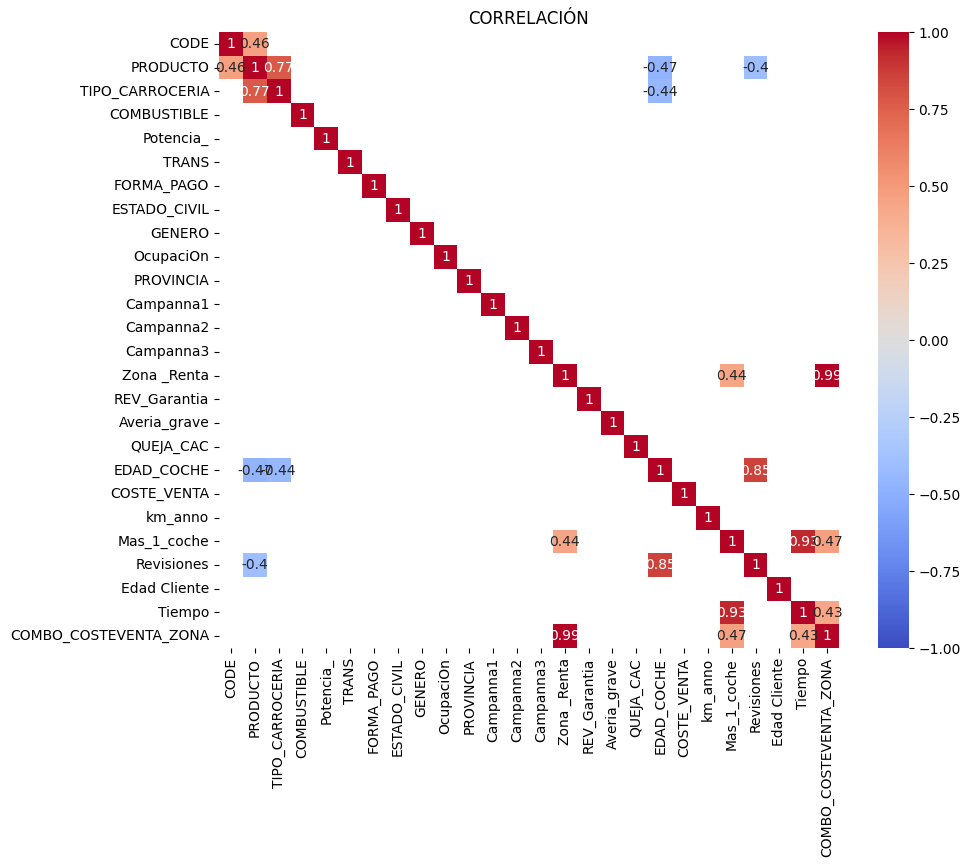

In [231]:
# Calcular la matriz de correlación
corr = df.corr()

# Aplicar un filtro para mostrar solo las correlaciones superiores a 0.6 o inferiores a -0.6
filtered_corr = corr[(corr > 0.4) | (corr < -0.4)]

# Crear el heatmap solo con las correlaciones filtradas
plt.figure(figsize=(10, 8))
plt.title('CORRELACIÓN')
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Cosas importantes

Hemos notado que al ser nuestra variable objetivo el comprar mas de un coche (Mas_1_coche), que es importante fijarse en las variables que más relacionadas están con ella.

Despues de un estudio de un mapa de correlación hemos deliverado que las más relacionadas son el tiempo (0.93) y la zona de renta (0.44).

Lo suyo sería establecer una nueva variable que guarde esta relación, donde la zona de renta poderemos más en función de que zona de renta tiene, y que también pondere más cuanto más tiempo haya entre compras, porque así hay más probabilidad de que necesite un coche nuevo.

In [209]:
df.to_csv('cars_clean.csv', index=False)

Queda hacer el mismo proceso pero para cars_input.csv actualmente con 0.85 de correlación